In [1]:
import numpy as np
import pandas as pd

In [2]:

# Read the Excel file
data = pd.read_csv("/kaggle/input/patient-survival-detection/Dataset.csv")



### checking null values

In [3]:
data.isna().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

In [4]:
data = data.dropna()
data.isna().sum()

encounter_id                   0
patient_id                     0
hospital_id                    0
hospital_death                 0
age                            0
                              ..
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
Length: 186, dtype: int64

### Dropping unnecessary columns

In [5]:
data1=data.drop(['ethnicity', 'gender', 'icu_admit_source', 'hospital_admit_source','icu_stay_type','icu_type','apache_2_bodysystem','apache_3j_bodysystem'], axis=1)

In [6]:
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
8286,80443,9930,89,1,67.0,28.146291,0,Caucasian,M,167.64,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8492,66332,22503,89,0,60.0,34.574559,0,Caucasian,M,177.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8717,107612,82369,89,0,66.0,25.775925,1,Caucasian,M,185.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Musculoskeletal/Skin,Undefined diagnoses
8727,88203,95246,89,0,55.0,56.659238,0,Other/Unknown,F,162.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal
9235,77729,21614,89,0,21.0,22.180764,0,Caucasian,M,182.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
9585,88464,35049,89,0,54.0,20.385384,0,Caucasian,F,172.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
10101,103283,101324,89,1,83.0,33.246642,0,Caucasian,M,162.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
10228,8879,38347,89,1,19.0,23.169473,0,Native American,M,175.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
12850,71711,5221,174,1,53.0,30.750308,0,Caucasian,F,162.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
17433,9451,19629,98,1,73.0,30.008090,0,Caucasian,M,172.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [7]:

# separating target and predictor variables
data_y = data1['hospital_death']
data_x = data1.drop('hospital_death',axis=1)

In [8]:
print(data.columns.tolist())


['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_

In [9]:

# Assuming 'data' is your DataFrame
categorical_columns = data1.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = data[column].value_counts()
    print(f"Column: {column}")
    print(unique_values)
    print("\n")


In [10]:
data_x

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
8286,80443,9930,89,67.0,28.146291,0,167.64,133,0.000000,0,...,0.84,0.81,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8492,66332,22503,89,60.0,34.574559,0,177.80,133,0.047222,0,...,0.35,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8717,107612,82369,89,66.0,25.775925,1,185.40,133,1.147222,0,...,0.18,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8727,88203,95246,89,55.0,56.659238,0,162.60,133,0.127778,0,...,0.27,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9235,77729,21614,89,21.0,22.180764,0,182.90,133,0.000000,0,...,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9585,88464,35049,89,54.0,20.385384,0,172.70,133,0.000000,0,...,0.33,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10101,103283,101324,89,83.0,33.246642,0,162.60,133,0.000000,0,...,0.91,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10228,8879,38347,89,19.0,23.169473,0,175.30,133,0.000000,0,...,0.07,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12850,71711,5221,174,53.0,30.750308,0,162.60,236,0.006944,0,...,0.94,0.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17433,9451,19629,98,73.0,30.008090,0,172.70,267,4.200000,0,...,0.92,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data_y

8286     1
8492     0
8717     0
8727     0
9235     0
9585     0
10101    1
10228    1
12850    1
17433    1
26102    1
31979    0
34109    1
35624    0
41288    0
41618    0
41834    0
42198    1
42242    1
42849    0
43400    0
43524    1
50649    1
52032    0
90317    0
Name: hospital_death, dtype: int64

In [12]:
# splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,  test_size=0.2, shuffle = True, random_state = 8)

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
X_train.shape, X_test.shape

((20, 177), (5, 177))

### Standardizing the train and test data

In [15]:
# importing relevent libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [16]:
from sklearn.preprocessing import MinMaxScaler
# creating an instance for MinMaxScaler
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [17]:
# storing the normalized data into a new dataframe
X_train_new = pd.DataFrame(X_train_std, columns= X_train.columns)
X_test_new = pd.DataFrame(X_test_std, columns= X_test.columns)

In [18]:
X_test_new.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0.071713,0.767934,0.511364,0.848485,-0.084111,0.0,0.082237,0.462435,0.00000,0.0,-0.200000,1.086957,0.964103,0.780033,1.0,0.0,0.043478,0.013699,0.022222,-0.200000,0.666667,1.0,0.0,0.0,0.336842,0.542857,0.785366,0.0,0.50000,0.429204,0.429204,0.168831,0.727092,0.517857,0.318182,0.543319,0.847255,1.0,0.431532,0.315789,0.771429,0.203390,0.306122,0.153846,0.306122,0.336449,0.415584,0.182927,1.000000,0.302521,0.512821,0.310345,0.512821,0.106383,0.789474,1.0,0.947368,0.659091,1.074074,0.629213,0.634615,0.538462,0.634615,0.357961,0.718804,0.287879,0.239437,0.239437,0.260274,0.2250,0.246753,0.347826,0.324074,0.144385,0.274725,0.333333,0.325843,0.302752,0.325843,0.151515,0.368421,1.00,1.000000,0.444444,0.465658,0.339286,0.514286,0.340741,0.510638,0.396657,0.482231,1.000000,1.086957,0.043478,0.115385,0.013699,0.028571,0.625,0.783784,0.044444,0.023256,0.265734,1.061404,0.458333,0.529630,0.640625,0.742857,0.689474,0.785366,0.030812,0.099099,0.026596,0.064220,0.410326,0.650966,0.129032,0.416667,0.473684,0.380952,0.359438,0.582813,1.00,1.00,0.115385,0.115385,0.029851,0.044118,0.571429,0.666667,0.023256,0.023256,0.43

In [19]:
X_train_new.shape

(20, 177)

### Model 1: Creating the Basic Deep Learning Model 

In [20]:
model = Sequential()
# adding first layer and using relu as an activation function
model.add(Dense(64, input_shape=(X_train_new.shape[-1],), activation='relu'))
# adding second layer to the sequential model
model.add(Dense(32, activation='relu'))
# Adding third layer 
model.add(Dense(16, activation='relu'))
# adding output layer to the model using sigmoid activation function which seems to be ideal for binary classification problem
model.add(Dense(1, activation='sigmoid'))


In [21]:
# printing the model summary just to get an idea about how many paramters are required for the current model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                11392     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 14017 (54.75 KB)
Trainable params: 14017 (54.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# metrics that might be useful for present project
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model.compile(optimizer=keras.optimizers.Adam(0.01),
              loss='binary_crossentropy',
              metrics=metrics)

In [23]:
### Training the model
epochs = 20
batch_size = 32
history = model.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.7431 - precision: 0.3889 - recall: 0.8750 - auc: 0.5000 - val_loss: 0.9771 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 67ms/step - loss: 0.5989 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8802 - val_loss: 0.6625 - val_precision: 0.6667 - val_recall: 0.6667 - val_auc: 0.5833
Epoch 3/20
1/1 [==============================] - 0s 45ms/step - loss: 0.5516 - precision: 0.7778 - recall: 0.8750 - auc: 0.9583 - val_loss: 0.8857 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6667
Epoch 4/20
1/1 [==============================] - 0s 46ms/step - loss: 0.4416 - precision: 1.0000 - recall: 0.6250 - auc: 0.9479 - val_loss: 1.0462 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8333
Epoch 5/20
1/1 [==============================] - 0s 47ms/step - loss: 0.3801 - precision: 1.0000 - recall: 0.6250 - auc: 0.97

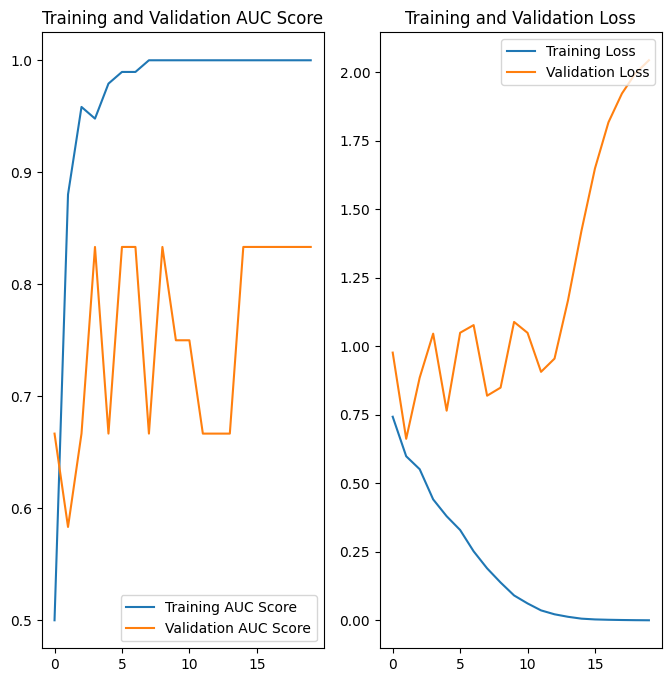

In [24]:
acc = history.history['auc']
val_acc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model 2: Using Dropouts

In [26]:
model2 = Sequential()

model2.add(Dense(64, input_shape=(X_train_new.shape[-1],), activation='relu'))
# using dropouts after every layer which prevents overfitting in most of the cases.
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

In [27]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                11392     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 14017 (54.75 KB)
Trainable params: 14017

In [29]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model2.compile(optimizer=keras.optimizers.Adam(0.01),
              loss='binary_crossentropy',
              metrics=metrics)

In [30]:
### Training the model
epochs = 20
batch_size = 32
history = model2.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.5999 - precision: 0.5000 - recall: 0.2500 - auc_2: 0.7500 - val_loss: 0.7489 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc_2: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 48ms/step - loss: 0.8369 - precision: 0.2500 - recall: 0.1250 - auc_2: 0.3177 - val_loss: 0.6748 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc_2: 0.8333
Epoch 3/20
1/1 [==============================] - 0s 57ms/step - loss: 0.7209 - precision: 0.5000 - recall: 0.3750 - auc_2: 0.5625 - val_loss: 0.6704 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc_2: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 45ms/step - loss: 0.8576 - precision: 0.6667 - recall: 0.5000 - auc_2: 0.5885 - val_loss: 0.7067 - val_precision: 1.0000 - val_recall: 0.3333 - val_auc_2: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 57ms/step - loss: 0.7507 - precision: 0.4167 - recall: 0.6250 - a

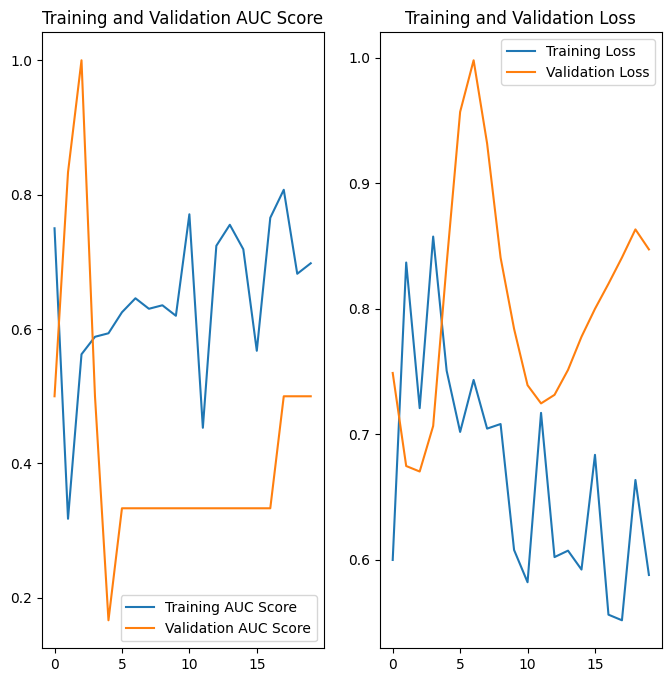

In [32]:
acc = history.history['auc_2']
val_acc = history.history['val_auc_2']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model 3: Dealing with Class Imbalance

In [33]:
model3 = Sequential()

model3.add(Dense(64, input_shape=(X_train_new.shape[-1],), activation='relu'))

model3.add(Dense(32, activation='relu'))

model3.add(Dense(16, activation='relu'))

model3.add(Dense(1, activation='sigmoid'))

In [34]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model3.compile(optimizer=keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=metrics)

In [35]:

class_weight = {0: 0.5, 1: 5}

In [36]:
### Training the model
epochs = 20
batch_size = 32
history = model3.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size,class_weight=class_weight)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 2.0092 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc_3: 0.6250 - val_loss: 0.7133 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc_3: 0.3333
Epoch 2/20
1/1 [==============================] - 0s 60ms/step - loss: 1.8254 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc_3: 0.6094 - val_loss: 0.7098 - val_precision: 0.5000 - val_recall: 0.3333 - val_auc_3: 0.4167
Epoch 3/20
1/1 [==============================] - 0s 60ms/step - loss: 1.7022 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc_3: 0.6719 - val_loss: 0.7108 - val_precision: 0.5000 - val_recall: 0.3333 - val_auc_3: 0.2500
Epoch 4/20
1/1 [==============================] - 0s 52ms/step - loss: 1.6134 - precision: 0.6667 - recall: 0.5000 - auc_3: 0.7396 - val_loss: 0.7098 - val_precision: 0.3333 - val_recall: 0.3333 - val_auc_3: 0.2500
Epoch 5/20
1/1 [==============================] - 0s 64ms/step - loss: 1.5612 - precision: 0.6667 - recall: 0.

### Model 4: Using Keras Tuner

In [37]:
import kerastuner as kt

/tmp/ipykernel_469/1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [50]:
def model_builder(hp):
    model3 = keras.Sequential()
    model3.add(keras.layers.Flatten(input_shape=[1]))

      # Tune the number of units in the first Dense layer
      # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model3.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model3.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model3.add(keras.layers.Dense(1, activation='sigmoid'))

      # Tune the learning rate for the optimizer
      # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    metrics = [
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(curve='ROC')]

    model3.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                    loss=keras.losses.BinaryCrossentropy(),
                    metrics=metrics)

    return model3

In [51]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=5)

In [52]:
 # using early stopping to stop training the model when optimal value of recall and loss values are achieved.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_recall', patience=5)

In [53]:
tuner.search(X_train_new.values, y_train, epochs=30, validation_data = (X_test_new.values, y_test), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 5 Complete [00h 00m 00s]

Best val_loss So Far: None
Total elapsed time: 00h 00m 00s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.01.



### Final Model after using Keras Tuner with optimal learning rate and number of units

In [54]:
model4 = Sequential()

model4.add(Dense(416, input_shape=(X_train_new.shape[-1],), activation='relu'))

model4.add(Dense(416, activation='relu'))

model4.add(Dense(1, activation='sigmoid'))

In [55]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model4.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss='binary_crossentropy',
              metrics=metrics)

In [56]:
### Training the model
epochs = 20
batch_size = 32
history = model4.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.7779 - precision: 0.4000 - recall: 1.0000 - auc_1: 0.1562 - val_loss: 0.6828 - val_precision: 0.6000 - val_recall: 1.0000 - val_auc_1: 0.2500
Epoch 2/20
1/1 [==============================] - 0s 51ms/step - loss: 0.7486 - precision: 0.4000 - recall: 1.0000 - auc_1: 0.2969 - val_loss: 0.6847 - val_precision: 0.6000 - val_recall: 1.0000 - val_auc_1: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 49ms/step - loss: 0.7221 - precision: 0.3684 - recall: 0.8750 - auc_1: 0.4531 - val_loss: 0.6891 - val_precision: 0.7500 - val_recall: 1.0000 - val_auc_1: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 49ms/step - loss: 0.6987 - precision: 0.4118 - recall: 0.8750 - auc_1: 0.5469 - val_loss: 0.6959 - val_precision: 0.5000 - val_recall: 0.3333 - val_auc_1: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 61ms/step - loss: 0.6782 - precision: 0.6250 - recall: 0.6250 - auc_1: 0.6667 - val_loss: